# Research Question

### A1 - Research Question

We have collected Yelp reviews with their corresponding ratings. Is it possible to use neural networks and natural language processing or NLP to predict future consumer sentiment with their reviews?

### A2 - Objectives and Goals

Using sentiment analysis, we will identify patterns or word combinations from previous Yelp reviews to better understand consumer sentiment. The goal is the accurately predict whether customers are satisfied based on their reviews. This will in turn help us understand our customers better and help other consumers when understand the establishment where the review was placed.

### A3 - Neural Network Selection

As stated by Nitin Hardeniya, "Natural Language Processing is analogous to teaching language to a child." In this case, we will be teaching the computer to read and understand words and sequences by transforming though NLP techniques.

# Data Preparation

### B1 - Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers


In [4]:
#read the csv file
data = pd.read_csv('yelp_labelled.txt',  sep='[:,;|_]!', engine='python', header=None)

In [5]:
#display first 10 rows
pd.set_option('display.max_colwidth', 5000)
data.head(10)

,0
0,Wow... Loved this place.\t1
1,Crust is not good.\t0
2,Not tasty and the texture was just nasty.\t0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1
4,The selection on the menu was great and so were the prices.\t1
5,Now I am getting angry and I want my damn pho.\t0
6,Honeslty it didn't taste THAT fresh.)\t0
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0
8,The fries were great too.\t1
9,A great touch.\t1


In [6]:
#add column name Review
data.columns=['Review']
data.head(10)

,Review
0,Wow... Loved this place.\t1
1,Crust is not good.\t0
2,Not tasty and the texture was just nasty.\t0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1
4,The selection on the menu was great and so were the prices.\t1
5,Now I am getting angry and I want my damn pho.\t0
6,Honeslty it didn't taste THAT fresh.)\t0
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0
8,The fries were great too.\t1
9,A great touch.\t1


In [7]:
#create Rating and extract rating from last character in the string of each row in the Review column
data['Rating'] = data['Review'].str[-1:]
data.head(10)

,Review,Rating
0,Wow... Loved this place.\t1,1
1,Crust is not good.\t0,0
2,Not tasty and the texture was just nasty.\t0,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1,1
4,The selection on the menu was great and so were the prices.\t1,1
5,Now I am getting angry and I want my damn pho.\t0,0
6,Honeslty it didn't taste THAT fresh.)\t0,0
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0,0
8,The fries were great too.\t1,1
9,A great touch.\t1,1


In [8]:
#remove the last 3 characters in the string of each row in the Review column
data['Review'] = data['Review'].str[:-3]
data.head(10)

,Review,Rating
0,Wow... Loved this place,1
1,Crust is not good,0
2,Not tasty and the texture was just nasty,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it,1
4,The selection on the menu was great and so were the prices,1
5,Now I am getting angry and I want my damn pho,0
6,Honeslty it didn't taste THAT fresh.,0
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer,0
8,The fries were great too,1
9,A great touch,1


<function matplotlib.pyplot.show(*args, **kw)>

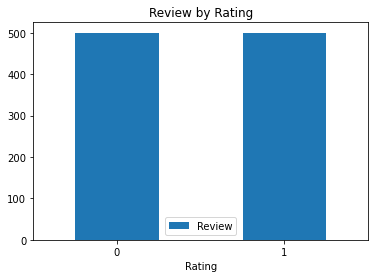

In [9]:
#display all ratings as a bivariate graph
ax = data.groupby('Rating').count().plot.bar(ylim=0)
ax.set_title('Review by Rating')
plt.xticks(rotation=0)
plt.show

In [10]:
#lower case all characters in the Review column
data['Review'] = data['Review'].str.lower()
data.head(10)

,Review,Rating
0,wow... loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday off rick steve recommendation and loved it,1
4,the selection on the menu was great and so were the prices,1
5,now i am getting angry and i want my damn pho,0
6,honeslty it didn't taste that fresh.,0
7,the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer,0
8,the fries were great too,1
9,a great touch,1


#### B1a - Presence of unusual or special characters

In [11]:
#list all characters used in the string
letters = data['Review']
list_of_characters = []
for letter in letters:
    for character in letter:
        if character not in list_of_characters:
            list_of_characters.append(character)
print(list_of_characters)

['w', 'o', '.', ' ', 'l', 'v', 'e', 'd', 't', 'h', 'i', 's', 'p', 'a', 'c', 'r', 'u', 'n', 'g', 'y', 'x', 'j', 'b', 'm', 'k', 'f', "'", ',', 'z', '-', '4', '2', '3', 'q', '!', '5', '1', '0', '&', 'ã', '©', ':', ';', '9', '7', '(', ')', '"', '/', '8', '$', '%', '+', '*', '?', '6', 'ª']


In [12]:
#remove all special characters
junk_char = ['.', ',',"'",'-','!','&','ã','©',':', ';','(', ')', '"', '/','$', '%', '+', '*', '?','ª']
for char in junk_char:
    data['Review'] = data['Review'].str.replace(char, ' ')

In [13]:
#check for any special characters again
letters_verify = data['Review']
list_of_characters_verify = []
for letter in letters_verify:
    for character in letter:
        if character not in list_of_characters_verify:
            list_of_characters_verify.append(character)
print(list_of_characters_verify)

['w', 'o', ' ', 'l', 'v', 'e', 'd', 't', 'h', 'i', 's', 'p', 'a', 'c', 'r', 'u', 'n', 'g', 'y', 'x', 'j', 'b', 'm', 'k', 'f', 'z', '4', '2', '3', 'q', '5', '1', '0', '9', '7', '8', '6']


#### B1b - Vocabulary Size

In [14]:
#vocabulary size
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Review'])
print('Vocabulary Size: ', len(tokenizer.word_index) + 1)

Vocabulary Size:  2058


#### B1c - Word Embedding

In [15]:
#word embedding lengths
sentence = []
for char in data['Review']:
    sentence.append(len(char.split(' ')))
print('The maximum length of a sentence is: ', np.max(sentence))
print('The minimum length of a sentence is: ', np.min(sentence))
print('The median length of a sentence is: ', np.median(sentence))

The maximum length of a sentence is:  35
The minimum length of a sentence is:  2
The median length of a sentence is:  10.5


#### B1d - Statistical justification for the chosen maximum sequence length

We will be padding all of our reviews to match the the sentence with the most words. All of our sentences will padded at the end of the sequence.

### B2 - Tokenization

The tokenization process is a way to index all unique words and save them as a dictionary. Each word will be attached to an index that will be used to train our model.

In [16]:
word_index = tokenizer.word_index
print(word_index)

{'the': 1, 'and': 2, 'i': 3, 'was': 4, 'a': 5, 'to': 6, 'is': 7, 'it': 8, 'this': 9, 'of': 10, 'food': 11, 'not': 12, 'for': 13, 'in': 14, 'place': 15, 't': 16, 'good': 17, 'we': 18, 'service': 19, 'very': 20, 'my': 21, 'with': 22, 'great': 23, 'had': 24, 'that': 25, 'be': 26, 'so': 27, 'you': 28, 'were': 29, 'are': 30, 'but': 31, 'have': 32, 'back': 33, 'they': 34, 'here': 35, 'on': 36, 'at': 37, 'like': 38, 'go': 39, 'all': 40, 'time': 41, 's': 42, 'our': 43, 'will': 44, 'there': 45, 'as': 46, 'really': 47, 'just': 48, 'an': 49, 'their': 50, 'if': 51, 'best': 52, 'would': 53, 'ever': 54, 'also': 55, 'friendly': 56, 'up': 57, 'only': 58, 'never': 59, 'one': 60, 'don': 61, 'no': 62, 'your': 63, 'restaurant': 64, 'out': 65, 'nice': 66, 'been': 67, 'what': 68, 'can': 69, 'from': 70, 'amazing': 71, 'again': 72, 'delicious': 73, 've': 74, 'vegas': 75, 'did': 76, 'by': 77, 'which': 78, 'm': 79, 'pretty': 80, 'some': 81, 'me': 82, 'came': 83, 'when': 84, 'experience': 85, 'staff': 86, 'get':

### B3 - Padding 

Post padding will be used to all our review data to match the review with the max length of 35.

In [17]:
#padding at the end of our sequence
sequence_data = tokenizer.texts_to_sequences(data['Review'])
padded_data = pad_sequences(sequence_data, maxlen=35, padding='post', truncating='post')
padded_data[42]

array([269,   6, 610, 940, 301, 447,  29,  17, 125,  18,  29, 611,  65,
        77,   1, 941, 942,   2, 133,  16, 132,   6,  89,   8,  13, 943,
        10, 203, 302,   0,   0,   0,   0,   0,   0])

In [18]:
feature_df = pd.DataFrame(padded_data)
feature_df = feature_df.astype(float)

In [19]:
target_df = pd.DataFrame(data['Rating'])
target_df = target_df['Rating'].astype(float)
target_df.dtypes

dtype('float64')

### B4 - Sentiment Analysis

We will be using a function to create our model. This model will be 3 hidden layers. This first and second layers will use the Relu activation function and the third layer will use the softmax function. The code is shown below:

def get_model():
    model = Sequential()
    model.add(layers.Dense(100, activation='relu', input_shape=(35,))) 
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    return model

### B5 - Steps used to prepare the data for analysis

1. Read the Yelp data and indicate no headers.
2. Add Review and Rating column names.
3. Separate the Rating score from the Review column.
4. Drop last 3 characters from Review column.
5. Lower case the review column.
6. Check for any unusual characters and remove them.
7. Check for the max length of word sequence.
8. Create a word index using tokenization.
9. Post-pad the sequence to standardize the length of all sentences.
10. Convert Rating column to float64 data type.
11. Save dataset to a csv file.
12. Split the dataset 80/20.
13. Create and fit the model.

In [20]:
f_train, f_test, t_train, t_test = train_test_split(feature_df, target_df, test_size=0.2, random_state=37)
print('feature data type:\n',f_train.dtypes)
print('\ntarget data type: ',t_train.dtypes)

feature data type:
 0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
dtype: object

target data type:  float64


### B6 - Copy of Prepared Dataset

In [21]:
#saves all 4 datasets into a csv files
data.to_csv('Cleaned TensorFlow Yelp Data.csv')

# Network Architecture

In [22]:
print(data.shape)
print(feature_df.shape)
print(target_df.shape)
print(feature_df.head())

(1000, 2)
(1000, 35)
(1000,)
      0      1      2     3      4      5      6      7      8      9   ...  \
0  430.0  166.0    9.0  15.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1  588.0    7.0   12.0  17.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2   12.0  153.0    2.0   1.0  431.0    4.0   48.0  432.0    0.0    0.0  ...   
3  589.0   77.0  294.0   1.0  590.0  295.0  894.0  895.0  182.0  896.0  ...   
4    1.0  167.0   36.0   1.0  110.0    4.0   23.0    2.0   27.0   29.0  ...   

    25   26   27   28   29   30   31   32   33   34  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 35 columns]


### C1 - Output of Model Summary

In [23]:
def get_model():
    model = Sequential()
    model.add(layers.Dense(2000, activation='sigmoid', input_shape=(35,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(500, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2000)              72000     
_________________________________________________________________
dropout (Dropout)            (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                25050     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102       
Total params: 1,097,652
Trainable params: 1,097,652
Non-trainable params: 0
______________________________________________

### C2 - Number of Layers

We have added 6 layers to our model:
1st layer is an input layer using the sigmoid activation with 2000 parameters.
2nd layer is a dropout layer to decrease overfitting.
3rd layer is a hidden layer using the sigmiod activation with 500 parameters.
4th layer is a dropout layer to decrease overfitting.
5th layer is a hidden layer using the relu activation with 50 parameters.
6th layer is an output layer using the softmax activation with 2 parameters.

Total and Trainable parameters is 1,097,652.

### C3 - Hyperparameters

#### C3a - Activation Functions

We are using 3 activation functions for this model: Sigmoid, Relu, and SoftMax. 

The Sigmoid Function is also called a squashing function as its domain is the set of all real numbers, and its range is (0, 1) (Mehreen Saeed, 2021). The sigmoid function is great for binary classification, especially that our target variable is whether the Yelp reviews is good or not.

The Recitified Linear Activation (ReLu) function is commonly used for hidden layers. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance (Jason Brownlee 2019)

The SoftMax funtion is a form of logistic regression that normalizes an input value into a vector of alues that follows a probability distribution whose total sums up to 1 (Hamza Mahmood 2018). We will using it for our final layer.

#### C3b - Nodes

Through trial and error, I have chosen 2000 paramameters or nodes in the first layer as this is slightly lower than the total number of total features in our input variable. On the second layer, I used 25% of the first node which is 500. For the third layer, I chose 10% of the second layer. For the final layer, I chose 2 nodes. 

#### C3c - Loss Function

I have chosen Sparse Categorical Crossentropy for the loss function in our model.

#### C3d - Optimizer

I have chosen the 'adam' optimizer in our model as it is one of the more popular optimization algorithms used in deep learning.

#### C3e - Stop Criteria

For our stopping criteria, we will be using Early Stopping. It is a way to stop training as soon as the validation error reaches a minimum (Aurélien Géron, 2019)

In [24]:
history = model.fit(f_train, t_train, batch_size=100, epochs=100) 

Epoch 1/100
8/8 [==============================] - 1s 13ms/step - loss: 1.5336 - accuracy: 0.4896
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 0.7979 - accuracy: 0.5049
Epoch 3/100
8/8 [==============================] - 0s 15ms/step - loss: 0.7364 - accuracy: 0.5144
Epoch 4/100
8/8 [==============================] - 0s 15ms/step - loss: 0.7295 - accuracy: 0.4874
Epoch 5/100
8/8 [==============================] - 0s 16ms/step - loss: 0.6939 - accuracy: 0.5342
Epoch 6/100
8/8 [==============================] - 0s 27ms/step - loss: 0.6802 - accuracy: 0.5473
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6980 - accuracy: 0.5033
Epoch 8/100
8/8 [==============================] - 0s 13ms/step - loss: 0.7045 - accuracy: 0.4730
Epoch 9/100
8/8 [==============================] - 0s 13ms/step - loss: 0.7080 - accuracy: 0.4882
Epoch 10/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6873 - accuracy: 0.5362
Epoch 11/100
8/8 [=

In [25]:
train_results = model.evaluate(f_train, t_train, verbose = 0)
print(f'Train Loss: {train_results[0]} \nTrain Accuracy: {train_results[1]}')
test_results = model.evaluate(f_test, t_test, verbose = 0)
print(f'Test Loss: {test_results[0]} \nTest Accuracy: {test_results[1]}')

Train Loss: 0.20796674489974976 
Train Accuracy: 0.9237499833106995
Test Loss: 0.9364308714866638 
Test Accuracy: 0.5400000214576721


In [26]:
# Predict and measure RMSE
pred = model.predict(f_test)
pred = pd.DataFrame(pred)
print('RMSE: ' ,mean_squared_error(pred[1],t_test)*(1/2))

RMSE:  0.1524133757375507


dict_keys(['loss', 'accuracy'])


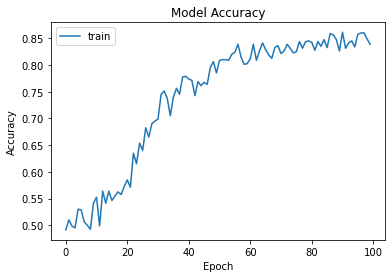

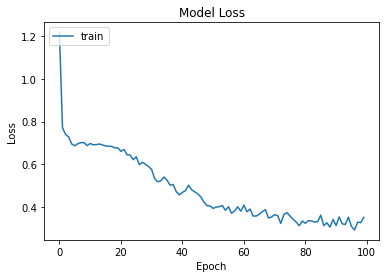

In [27]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
early_stop = EarlyStopping(patience=5, mode='max')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(f_train, t_train,batch_size = 20, epochs=20, callbacks=[early_stop], validation_split=0.2)

Epoch 1/20
32/32 [==============================] - 2s 48ms/step - loss: 0.3223 - accuracy: 0.8638 - val_loss: 0.3255 - val_accuracy: 0.8687
Epoch 2/20
32/32 [==============================] - 0s 10ms/step - loss: 0.3829 - accuracy: 0.8270 - val_loss: 0.3811 - val_accuracy: 0.8188
Epoch 3/20
32/32 [==============================] - 0s 10ms/step - loss: 0.3683 - accuracy: 0.8185 - val_loss: 0.3470 - val_accuracy: 0.8375
Epoch 4/20
32/32 [==============================] - 0s 9ms/step - loss: 0.3860 - accuracy: 0.8201 - val_loss: 0.4164 - val_accuracy: 0.8000
Epoch 5/20
32/32 [==============================] - 0s 10ms/step - loss: 0.3798 - accuracy: 0.8134 - val_loss: 0.4041 - val_accuracy: 0.7937
Epoch 6/20
32/32 [==============================] - 0s 10ms/step - loss: 0.3352 - accuracy: 0.8502 - val_loss: 0.4364 - val_accuracy: 0.7688
Epoch 7/20
32/32 [==============================] - 0s 9ms/step - loss: 0.4103 - accuracy: 0.7904 - val_loss: 0.4990 - val_accuracy: 0.6812
Epoch 8/20
32/3

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2000)              72000     
_________________________________________________________________
dropout (Dropout)            (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                25050     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102       
Total params: 1,097,652
Trainable params: 1,097,652
Non-trainable params: 0
______________________________________________

#### C3f - Evaluation Metric

We will be using Loss, Accuracy, and Root Mean Squared Error as our evaluation metrics. The training accuracy is 88.38% and the test accuracy is 56%

In [30]:
train_results = model.evaluate(f_train, t_train, verbose = 0)
print(f'Train Loss: {train_results[0]} \nTrain Accuracy: {train_results[1]}')
test_results = model.evaluate(f_test, t_test, verbose = 0)
print(f'Test Loss: {test_results[0]} \nTest Accuracy: {test_results[1]}')

Train Loss: 0.293621301651001 
Train Accuracy: 0.8837500214576721
Test Loss: 0.9195660948753357 
Test Accuracy: 0.5600000023841858


In [31]:
# Predict and measure RMSE
pred = model.predict(f_test)
pred = pd.DataFrame(pred)
print('RMSE: ' ,mean_squared_error(pred[1],t_test)*(1/2))

RMSE:  0.14868170999171842


# Model Evaluation

### D1 - Stopping Criteria Used

We have used early stopping criteria with a mode arugument as 'max' to stop when the value being monitored stopped increasing together with a patience argument of '3' to stop when there is no improvement for the next 3 epochs.

### D2 - Visualization

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


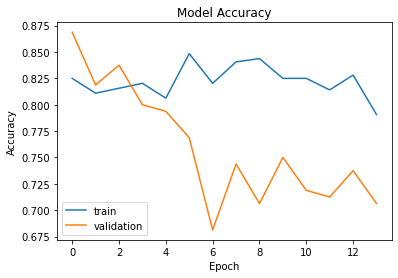

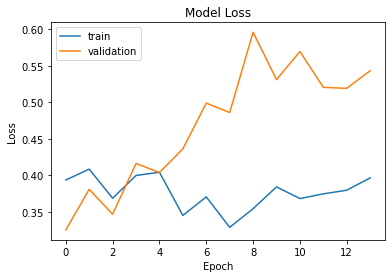

In [32]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### D3 - Assesment

The model clearly shows that it is overfitting even when adding dropout layers to decrease it. The accuracy between the training dataset and test dataset is a difference of around 30%. Number of layers, type of functions, number of epochs have been tested to try to minimize overfitting. Since all these steps have been unsuccessful at increase test accuracy, the next thing that could be done is to aqcuire more training data.

### D4 - Predictive Accuracy

The training accuracy is 88.38% and the test accuracy is 56%. Below are the calculations of the accuracies.
Below also shows a sample of 3 reviews with their actual and predicted results.

In [33]:
train_results = model.evaluate(f_train, t_train, verbose = 0)
print(f'Train Loss: {train_results[0]} \nTrain Accuracy: {train_results[1]}')
test_results = model.evaluate(f_test, t_test, verbose = 0)
print(f'Test Loss: {test_results[0]} \nTest Accuracy: {test_results[1]}')

Train Loss: 0.293621301651001 
Train Accuracy: 0.8837500214576721
Test Loss: 0.9195660948753357 
Test Accuracy: 0.5600000023841858


In [34]:
prediction = model.predict(padded_data)
i = 15
print('Predicted: ', 'Negative' if prediction[i][0] >=0.5 else 'Positive', 'review')
print('Actual: ', 'Negative' if padded_data[i][1] == 0 else 'Positive', 'review')

i = 67
print('Predicted: ', 'Negative' if prediction[i][0] >=0.5 else 'Positive', 'review')
print('Actual: ', 'Negative' if padded_data[i][1] == 0 else 'Positive', 'review')

i = 99
print('Predicted: ', 'Negative' if prediction[i][0] >=0.5 else 'Positive', 'review')
print('Actual: ', 'Negative' if padded_data[i][1] == 0 else 'Positive', 'review')

Predicted:  Negative review
Actual:  Positive review
Predicted:  Positive review
Actual:  Positive review
Predicted:  Positive review
Actual:  Positive review


# Summary and Recommendation

The goal of this analysis is to accurately predict the Ratings of Yelp Reviews. Although our model has run smoothly, the accuracy of our test set is low. This indicates the model is overfitting. More training data must be used to try to decrease overfitting and increase the accuracy of the model. Once more data has been aqcuired, the model can be used again without running the entire code. The model has been saved to the file Yelp_Sentimental_Analysis.h5.  

In [35]:
model.save('Yelp_Sentimental_Analysis.h5')

### References

* Nitin Hardeniya (2016) - Natural Language Processing: Python and NLTK. Packt Publishing; Retrieved from: https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1426890&site=eds-live&scope=site
*  Mehreen Saeed (2021) - A Gentle Introduction To Sigmoid Function. Retrieved from: https://machinelearningmastery.com/a-gentle-introduction-to-sigmoid-function/
* Jason Brownlee (2019) - A Gentle Introduction to the Rectified Linear Unit (ReLU). Retrieved from: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
* Hamza Mahmood (2019) - The Softmax Function, Simplified. Retrieved from: https://towardsdatascience.com/softmax-function-simplified-714068bf8156
* Aurélien Géron (2019) - Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow : concepts, tools, and techniques to build intelligent systems (Second edition.). O’Reilly.

### Third Party Code

* https://devenum.com/how-to-convert-text-file-into-pandas-dataframe/
* https://www.tensorflow.org/guide/keras/sequential_model
* https://keras.io/api/callbacks/early_stopping/
* https://www.tensorflow.org/tutorials/keras/overfit_and_underfit
